## 4.10 Final Analysis Part 3

### Contents
#### Importing Libraries
#### Importing Data
#### Combining the 3 profiling variables into one column
#### Visualizations of profiles
##### Top 5 Profiles
##### Bottom 5 Profiles
#### Export Data

### Importing Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


### Import Data

In [6]:
# Define pathway to relevant folder
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/07-2024 Instacart Basket Analysis'

In [8]:
# Import Sample of 100K Rows with profiling
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'sample_w_profiling.pkl'))

### Combining the 3 profiling variables into one column

In [11]:
# View columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_placed', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'med_days_prior', 'frequency_flag', 'Unnamed: 0',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge', 'region', 'Activity', 'age_group',
       'income_group', 'family_role'],
      dtype='object')

In [13]:
# Concatenate Profiling columns
df['profile'] = df['gender'] + df['age_group'] + df['income_group'] + df['family_role']
print(df['profile'])

258         Femaleyoung adultmiddle-incomemarried parent
773           Maleyoung adultmiddle-incomemarried parent
1468                Maleadultmiddle-incomemarried parent
2088             Maleseniormiddle-incomesingle childless
2199             Maleseniormiddle-incomesingle childless
                                ...                     
32404073        Maleolder adulthigh-incomemarried parent
32404103        Maleolder adulthigh-incomemarried parent
32404215        Maleolder adulthigh-incomemarried parent
32404465        Maleolder adulthigh-incomemarried parent
32404693        Maleolder adulthigh-incomemarried parent
Name: profile, Length: 100228, dtype: object


In [15]:
# Adding Commas
df['profile'] = df['gender'] + ', ' + df['age_group'] + ', ' + df['income_group'] + ', ' + df['family_role']
print(df['profile'])

258         Female, young adult, middle-income, married pa...
773          Male, young adult, middle-income, married parent
1468               Male, adult, middle-income, married parent
2088            Male, senior, middle-income, single childless
2199            Male, senior, middle-income, single childless
                                  ...                        
32404073       Male, older adult, high-income, married parent
32404103       Male, older adult, high-income, married parent
32404215       Male, older adult, high-income, married parent
32404465       Male, older adult, high-income, married parent
32404693       Male, older adult, high-income, married parent
Name: profile, Length: 100228, dtype: object


In [17]:
df['profile'].value_counts(dropna = False)

profile
Male, senior, middle-income, married parent             7357
Female, senior, middle-income, married parent           7220
Male, adult, middle-income, married parent              6968
Female, adult, middle-income, married parent            6661
Male, older adult, middle-income, married parent        6380
Female, young adult, middle-income, married parent      6361
Male, young adult, middle-income, married parent        6332
Female, older adult, middle-income, married parent      6116
Female, young adult, middle-income, single childless    2845
Male, young adult, middle-income, single childless      2832
Female, senior, middle-income, single childless         2409
Male, senior, middle-income, single childless           2295
Male, adult, middle-income, single childless            2278
Female, older adult, middle-income, single childless    2199
Female, adult, middle-income, single childless          2195
Male, young adult, middle-income, single parent         2095
Male, older adul

### Visualizations of profiles

#### Top 5 Profiles

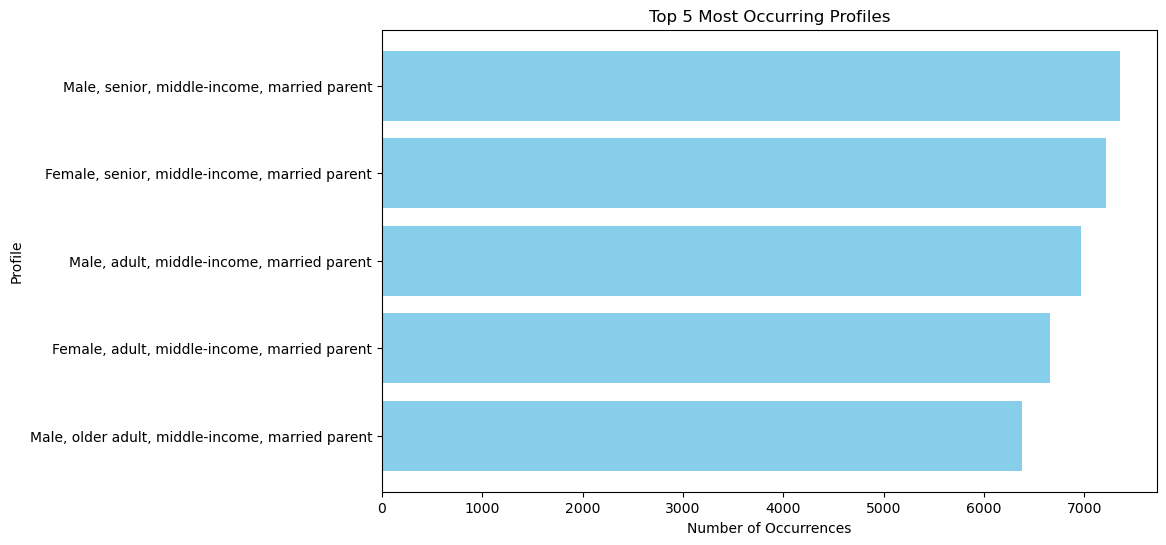

In [27]:
# Count occurrences of each profile
profile_counts = df['profile'].value_counts()

# Get the top 5 most occurring profiles
top_5_profiles = profile_counts.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_profiles.index, top_5_profiles.values, color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Profile')
plt.title('Top 5 Most Occurring Profiles')
plt.gca().invert_yaxis()  # Optional: to have the most occurring profile on top
plt.show()

In [56]:
# Save visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_5_profiles.png'),bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### Bottom 5 profiles

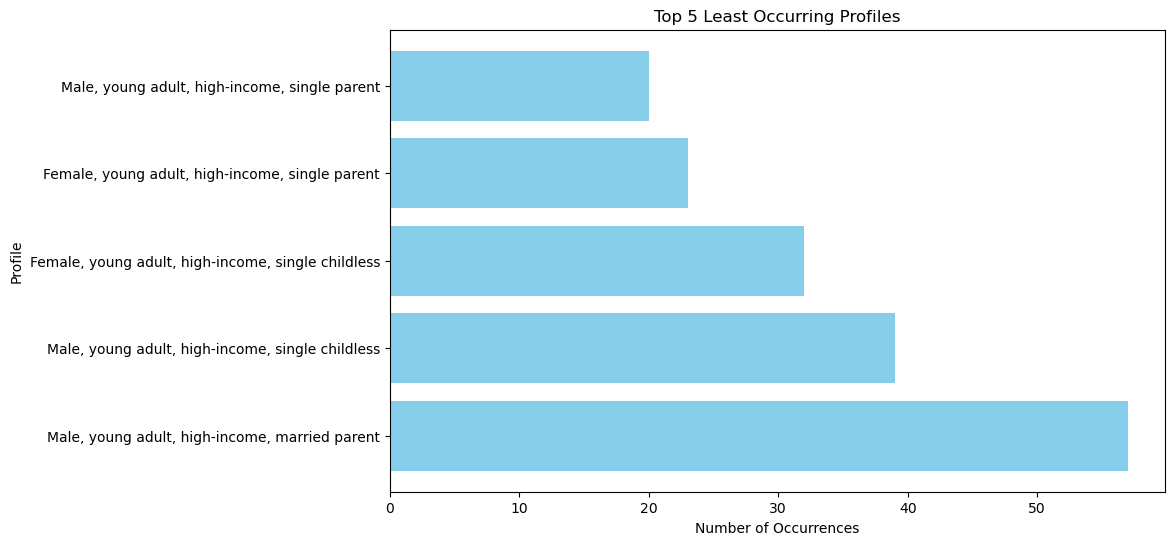

In [36]:
# Get the bottom 5 most occurring profiles
bottom_5_profiles = profile_counts.tail(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bottom_5_profiles.index, bottom_5_profiles.values, color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Profile')
plt.title('Top 5 Least Occurring Profiles')

plt.show()

In [54]:
plt.show()

In [48]:
# Export Visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bottom_5_profiles.png'))

<Figure size 640x480 with 0 Axes>

### Export Data

In [59]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '8_4_Sample.pkl'))